In [47]:
"""
The main research question that I will be addressing for my dataset is given a set of variables 
such as location, time, and contributing factors, what is the probability of injury or 
fatality and which factors have the highest probability of death. My data set covers data on 
vehicle crashes in New York city with many categorical variables. Due to there being an abundance of 
categorical variables I am limited in the models that will work best for this data. The results of 
the research will be significant because it can be applied to road safety and precautions, 
which can also be extended to things such as policy changes. The information gathered from 
results can also be useful to the general population as the results will provide 
information on what makes car crashes more deadly. This can be applied to the average 
vehicle operator's life and will hopefully inform people on how dangerous driving can be. 
Even though some of New York is very urban, there are also some boroughs such as Staten Island, 
Queens, and the Bronx, which have some large suburban areas. As a result of this the research 
results found can still be informative for other cities that may have similar urban/suburban 
structure, levels of walkability, and public transportation available in the United States. 
Choosing to ignore this and similar research will lead to lack of road safety and a societal 
ignorance of vehicle collision related deaths and injuries. 


Data source: https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95/about_data 

The data that I will be using for the final project covers vehicle crashes in New York city. 
The data from this source has vehicle crashes reported to the New York city police department. 
It is stated that a report must be filed for collisions where someone is injured or killed, or 
where there is at least $1000 worth of damage. This will be something to keep in mind during 
evaluation and explanation of the research as the data will be inherently skewed towards more 
dangerous and destructive vehicle collisions. 

There are numeric columns for time, zip code (which would probably be categorical), longitude, 
latitude, location (both longitude and latitude) as well as injuries and deaths for: persons, 
pedestrians, cyclists, and  motorists. For the time it is in HH:MM format, the number of deaths 
and injuries are just simple numeric integers.

For qualitative variables there is a crash date: Month/day/year format. Borough
which is a string of which borough in NY the crash occurred. On street name, cross street name, 
and off street name. These are all strings of a street for which the crash occurred. There are 5 
contributing factor columns for each crash. These columns include string values for factors that 
are deemed causes of the crash such as unsafe speed, obstruction of view etc. There are a lot 
of "unspecified values" in these columns and a lot of null values for 3, 4, and 5. This will need 
to be addressed in some way for the model. There also are 5 columns for vehicle type code which 
contain string values for the vehicles involved such as sedan, bike, taxi etc.

For the number of observations in my dataset there are about 2 million entries in the full data set. 
The data dates back to July 1st 2012 and has been updated ever since. I downloaded this
data set on september 15th 2025 so that is where my data will end. For the linear
regression model I created a subset of the full data set by randomly grouping 10k rows
of data into a separate csv. I may utilize a larger subset of data for the final
project but it needs to be small enough to upload to github.

This data set is suitable for my project because I am looking to analyze the dangers
of vehicles and causes of crashes in New York city. The dataset is large and rich with different
predictors which with a well performing model can have great explanatory value
for understanding vehicle collisions and what makes them dangerous.


"""



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing original full data set (downloaded for all crashes up to october 3rd)
#Please see zipped version of full data set and use that as the full 
# original file was too large to upload to git

# if no zip file is avaible see data subset which was created after addressing data issues
df = pd.read_csv("collisions_oct.csv")
df = df.iloc[:2209942] # trying to repicate original file size as original download was lost
df.info()

/var/folders/hw/v5wlkvcj7970fdpg2_t6kznm0000gn/T/ipykernel_45968/472769170.py:70: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("collisions_oct.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209942 entries, 0 to 2209941
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [48]:
#all columns in dataset 
df.columns


Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [49]:
#feature prep: 
#see imbalanced data in fatalities: 
df["HOUR"] = df["CRASH TIME"].str.split(":").str[0].astype(float)
df["HOUR"] = pd.to_numeric(df["HOUR"])
df["ANY_FATALITY"] = (df["NUMBER OF PERSONS KILLED"] >0).astype(int)
df['ANY_FATALITY'].value_counts(normalize=True)


ANY_FATALITY
0    0.998484
1    0.001516
Name: proportion, dtype: float64

In [50]:
"EDA Below!"

'EDA Below!'

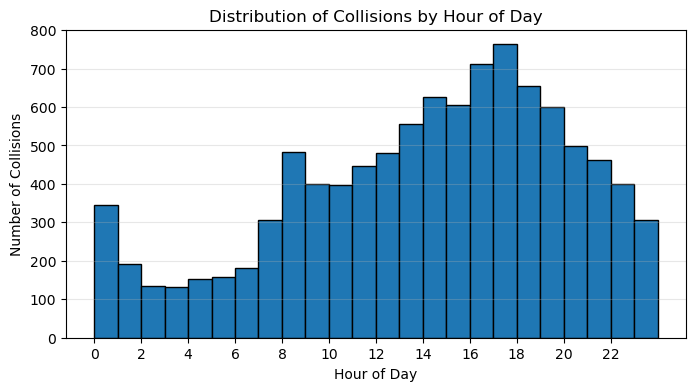

In [30]:

plt.figure(figsize = (8, 4))
plt.hist(df["HOUR"], bins = range(0, 25), edgecolor= "black")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Collisions")
plt.title("Distribution of Collisions by Hour of Day")
plt.xticks(range(0, 24, 2))
plt.grid(axis = "y", alpha = 0.3)
plt.show()
#higher number of crashes towards rush hours

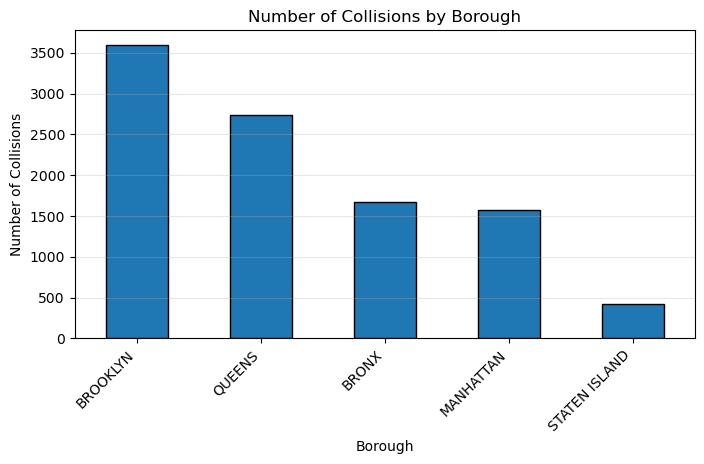

In [31]:
#visualizing number of collisions by borough
plt.figure(figsize = (8,4))
borough_counts = df["BOROUGH"].value_counts().sort_values(ascending = False)
borough_counts.plot(kind = "bar", edgecolor = "black")
plt.xlabel("Borough")
plt.ylabel("Number of Collisions")
plt.title("Number of Collisions by Borough")
plt.xticks(rotation = 45, ha = 'right')
plt.grid(axis = 'y', alpha = 0.3)
plt.show()
#brooklyn has the most collisions with staten island having the least

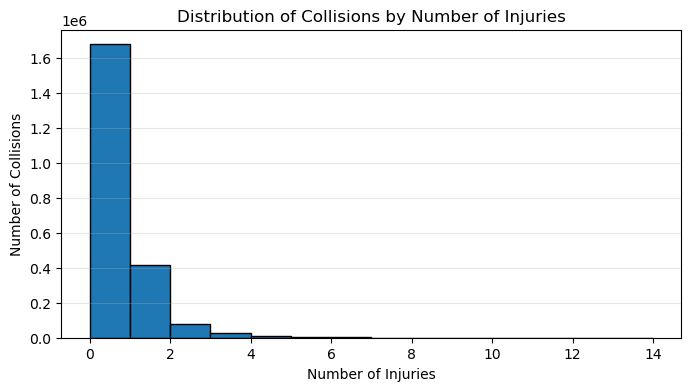

In [7]:
#disrtibution of injuries 
plt.figure(figsize = (8, 4))
plt.hist(df["NUMBER OF PERSONS INJURED"], bins = range(0, 15), edgecolor= "black")
plt.xlabel("Number of Injuries")
plt.ylabel("Number of Collisions")
plt.title("Distribution of Collisions by Number of Injuries")
plt.xticks(range(0, 15, 2)) 
plt.grid(axis = "y", alpha = 0.3)
plt.show()
# majority have 1 injury with there being an exponential decrease in collisions as the injuries go up 

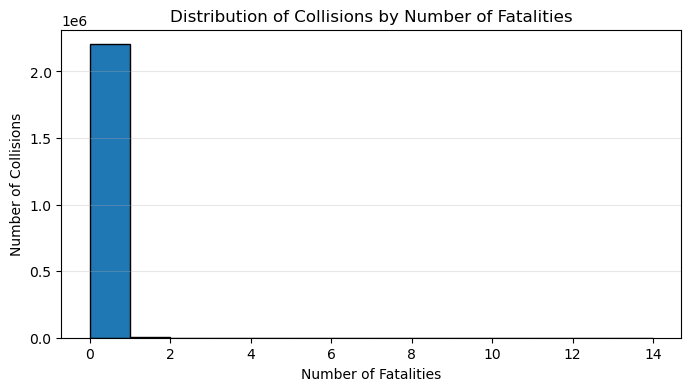

In [8]:
plt.figure(figsize = (8, 4))
plt.hist(df["NUMBER OF PERSONS KILLED"], bins = range(0, 15), edgecolor= "black")
plt.xlabel("Number of Fatalities")
plt.ylabel("Number of Collisions")
plt.title("Distribution of Collisions by Number of Fatalities")
plt.xticks(range(0, 15, 2)) 
plt.grid(axis = "y", alpha = 0.3)
plt.show()

In [51]:
df[['NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED']].describe()

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
count,2.209924e+06,2.209911e+06,2.209942e+06,2.209942e+06,2.209942e+06,2.209942e+06,2.209942e+06,2.209942e+06
mean,3.270063e-01,1.581512e-03,5.933187e-02,7.823735e-04,2.898900e-02,1.253427e-04,2.340989e-01,6.439083e-04
std,7.140301e-01,4.198487e-02,2.495154e-01,2.860003e-02,1.700101e-01,1.123530e-02,6.752295e-01,2.770341e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00


In [52]:
# distribution of collisions among the boroughs
df["BOROUGH"].value_counts(normalize=True)

BOROUGH
BROOKLYN         0.320301
QUEENS           0.267991
MANHATTAN        0.221709
BRONX            0.148104
STATEN ISLAND    0.041895
Name: proportion, dtype: float64

In [53]:
#looking at percent of missing values per column 

na_percent = df.isna().mean()*100
print(na_percent.sort_values(ascending=False))
# due to high number of missing values in certain columns i will automatically choose not to use these columns 
# (columns with more than 80% missing data)


VEHICLE TYPE CODE 5              99.561979
CONTRIBUTING FACTOR VEHICLE 5    99.547726
VEHICLE TYPE CODE 4              98.408194
CONTRIBUTING FACTOR VEHICLE 4    98.348599
VEHICLE TYPE CODE 3              93.045474
CONTRIBUTING FACTOR VEHICLE 3    92.765149
OFF STREET NAME                  82.437231
CROSS STREET NAME                38.203129
ZIP CODE                         30.696914
BOROUGH                          30.684470
ON STREET NAME                   21.742697
VEHICLE TYPE CODE 2              19.990298
CONTRIBUTING FACTOR VEHICLE 2    16.012230
LOCATION                         10.871914
LONGITUDE                        10.871914
LATITUDE                         10.871914
VEHICLE TYPE CODE 1               0.722281
CONTRIBUTING FACTOR VEHICLE 1     0.351457
NUMBER OF PERSONS KILLED          0.001403
NUMBER OF PERSONS INJURED         0.000815
HOUR                              0.000000
COLLISION_ID                      0.000000
CRASH DATE                        0.000000
NUMBER OF C

In [54]:
# Sense there are over 2 million rows of data I am going to automatically drop rows 
# with missing data in key columns that i plan to use for logistic regression model.
df = df.dropna(subset = ['BOROUGH', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 
                         'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
                         'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 
                           ])

df.isna().sum().sum()


8376852

In [55]:
na_percent = df.isna().mean()*100
print(na_percent.sort_values(ascending=False))

#because of the high percent of NAs even after dropping rows with missing data in key columns 
#i will not use them for analysis
# proposed research question(s) will use the columns i dropped na values of anyway 

VEHICLE TYPE CODE 5              99.456447
CONTRIBUTING FACTOR VEHICLE 5    99.445579
VEHICLE TYPE CODE 4              98.120225
CONTRIBUTING FACTOR VEHICLE 4    98.071110
VEHICLE TYPE CODE 3              92.166749
CONTRIBUTING FACTOR VEHICLE 3    91.896068
OFF STREET NAME                  80.764850
CROSS STREET NAME                19.318301
ON STREET NAME                   19.277441
LOCATION                          2.393000
LONGITUDE                         2.393000
LATITUDE                          2.393000
ZIP CODE                          0.018113
CONTRIBUTING FACTOR VEHICLE 2     0.000000
VEHICLE TYPE CODE 2               0.000000
VEHICLE TYPE CODE 1               0.000000
COLLISION_ID                      0.000000
HOUR                              0.000000
CRASH DATE                        0.000000
NUMBER OF CYCLIST KILLED          0.000000
CONTRIBUTING FACTOR VEHICLE 1     0.000000
NUMBER OF MOTORIST KILLED         0.000000
NUMBER OF MOTORIST INJURED        0.000000
CRASH TIME 

In [63]:
# number of rows left after dropping rows with missing data in key columns
num_rows = len(df)
print(num_rows)

1187004


In [57]:
category_counts = df["CONTRIBUTING FACTOR VEHICLE 1"].value_counts()
print(category_counts)

CONTRIBUTING FACTOR VEHICLE 1
Unspecified                       397888
Driver Inattention/Distraction    242935
Failure to Yield Right-of-Way      74131
Backing Unsafely                   52561
Following Too Closely              46815
                                   ...  
80                                    42
Shoulders Defective/Improper          30
Texting                               24
Listening/Using Headphones            16
1                                      7
Name: count, Length: 61, dtype: int64


In [58]:
#checking how many crashes actually have fatalities

df['ANY_FATALITY'].value_counts(normalize=True)
# due to extreme imbalance in fatalities vs none i must create new subset of data to address this 

ANY_FATALITY
0    0.999278
1    0.000722
Name: proportion, dtype: float64

In [ ]:
#print(df.dtypes)
#checking data types

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

In [59]:
#number of rows with fatalities
#print(df["ANY_FATALITY"].value_counts())
#trying building smaller dataset because kernerl is crashing when running first logistic model
#keeping all fatal rows and adding sample of non fatal crashes
#this helps create a more balanced sample of the data that i can use for logistic regression
fatal = df[df["ANY_FATALITY"] == 1]
nonfatal = df[df["ANY_FATALITY"] == 0].sample( n=min(len(fatal) * 10, 100_000), random_state=0)
dfm = pd.concat([fatal, nonfatal], ignore_index=True)
print(len(fatal))
print(len(nonfatal))
print(dfm.shape)
# just under 900 fatal crashes then added about 8,000 additinal rows for a more balanced data set still has some imbalance though 
# ~1:10 ratio 

857
8570
(9427, 31)


In [60]:
#checking which factors are used the most 
category_counts = dfm["CONTRIBUTING FACTOR VEHICLE 1"].value_counts()
print(category_counts)
#because some factors occur very little i am only going to look at the top 16 factors 
# this will help the model with handling the high amount of categories and get more meanigful results

CONTRIBUTING FACTOR VEHICLE 1
Unspecified                                              3112
Driver Inattention/Distraction                           1861
Failure to Yield Right-of-Way                             596
Backing Unsafely                                          392
Following Too Closely                                     339
Other Vehicular                                           321
Traffic Control Disregarded                               316
Passing or Lane Usage Improper                            249
Passing Too Closely                                       240
Turning Improperly                                        239
Unsafe Speed                                              200
Fatigued/Drowsy                                           173
Driver Inexperience                                       165
Alcohol Involvement                                       152
Lost Consciousness                                        124
Unsafe Lane Changing                    

In [61]:
category_counts_vehicle = dfm["VEHICLE TYPE CODE 1"].value_counts()
print(category_counts_vehicle)

VEHICLE TYPE CODE 1
Sedan                                  2307
PASSENGER VEHICLE                      2086
Station Wagon/Sport Utility Vehicle    1851
SPORT UTILITY / STATION WAGON           932
Taxi                                    211
                                       ... 
Minibike                                  1
Utili                                     1
Beverage Truck                            1
FORKL                                     1
DELV                                      1
Name: count, Length: 83, dtype: int64


In [ ]:
#df.to_csv("vehicle_collision_subset.csv", index = False)
#creating subset file 
# SUBSET FILE USE CAN START HERE

In [20]:
#PACKAGE BINARY LOGISTIC MODEL (Fatality 1 vs no fatalities 0) created to verify scratch results 
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from patsy import Treatment
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# keeping only top significant unique values in categorical columns (keeping it at top 16 )
# grouping the remaining variables with low observations into an 'other' class
def keep_top_categories(series, top_n=16):
    top = series.value_counts().nlargest(top_n).index
    return series.where(series.isin(top), "Other")

#clean amd simplify categories
dfm['VEHICLE TYPE CODE 1'] = dfm['VEHICLE TYPE CODE 1'].str.upper()

dfm['CF1_SIMPL'] = keep_top_categories(dfm['CONTRIBUTING FACTOR VEHICLE 1'], top_n=16)
dfm['VT1_SIMPL'] = keep_top_categories(dfm['VEHICLE TYPE CODE 1'], top_n=16)

dfm['CF1_SIMPL'] = dfm['CF1_SIMPL'].str.strip()
dfm['VT1_SIMPL'] = dfm['VT1_SIMPL'].str.strip()
dfm['BOROUGH']   = dfm['BOROUGH'].str.strip()

#make sure these exist as labels
#print(dfm['CF1_SIMPL'].value_counts().head())
#print(dfm['VT1_SIMPL'].value_counts().head())

#build modeling dataframe with needed cols
df_model = dfm[['ANY_FATALITY', 'HOUR', 'BOROUGH', 'CF1_SIMPL', 'VT1_SIMPL']].dropna()

# train test split 80/20
train_df, test_df = train_test_split(
    df_model,
    test_size=0.2,
    random_state=42,
    stratify=df_model['ANY_FATALITY']
)

# fitting logistic regression with chosen references for better interpretability of results
formula = (
    "ANY_FATALITY ~ HOUR"
    " + C(BOROUGH, Treatment(reference='BRONX'))"
    " + C(CF1_SIMPL, Treatment(reference='Unspecified'))"
    " + C(VT1_SIMPL, Treatment(reference='4 DR SEDAN'))"
)

model = smf.logit(formula=formula, data=train_df).fit()
print(model.summary())
 

         Current function value: 0.237955
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:           ANY_FATALITY   No. Observations:                 7497
Model:                          Logit   Df Residuals:                     7459
Method:                           MLE   Df Model:                           37
Date:                Tue, 16 Dec 2025   Pseudo R-squ.:                  0.2192
Time:                        11:59:08   Log-Likelihood:                -1783.9
converged:                      False   LL-Null:                       -2284.9
Covariance Type:            nonrobust   LLR p-value:                3.345e-186
                                                                                             coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [21]:
import numpy as np
import pandas as pd
#turn coefficients (log odds) into odds ratios

params = model.params
conf = model.conf_int()
conf.columns = ['2.5%', '97.5%']

or_table = pd.DataFrame({
    'coef': params,
    'odds_ratio': np.exp(params),
    '2.5%': np.exp(conf['2.5%']),
    '97.5%': np.exp(conf['97.5%']),
    'pvalue': model.pvalues
}).sort_values('odds_ratio', ascending=False)

#removing dumb long reference col name change
def clean_term(name: str) -> str:
    # keeping const and HOUR the same 
    if name == 'Intercept' or name == 'const' or name == 'HOUR':
        return name
    
    if name.startswith('C('):
        # C(VT1_SIMPL,  Treatment(reference='4 DR SEDAN'))[T.MOTORCYCLE]
        var_part = name.split(',')[0]        #  "C(VT1_SIMPL"
        var_name = var_part.replace('C(', '')  #  "VT1_SIMPL"
        level = name.split('T.')[-1].rstrip(']')  #    "MOTORCYCLE"
        return f"{var_name} = {level}"
    else:
        return name

or_table = or_table.copy()
or_table['term'] = or_table.index.map(clean_term)
or_table = or_table.set_index('term')



print(or_table)


                                                      coef    odds_ratio  \
term                                                                       
VT1_SIMPL = MOTORCYCLE                            4.016481  5.550546e+01   
CF1_SIMPL = Unsafe Speed                          2.706756  1.498061e+01   
VT1_SIMPL = BOX TRUCK                             2.527267  1.251925e+01   
CF1_SIMPL = Traffic Control Disregarded           2.361990  1.061205e+01   
VT1_SIMPL = UNKNOWN                               2.108956  8.239635e+00   
VT1_SIMPL = Other                                 2.072732  7.946506e+00   
VT1_SIMPL = BIKE                                  2.013522  7.489647e+00   
CF1_SIMPL = Alcohol Involvement                   1.703265  5.491850e+00   
VT1_SIMPL = BUS                                   1.544791  4.686992e+00   
VT1_SIMPL = PICK-UP TRUCK                         1.381621  3.981348e+00   
VT1_SIMPL = LARGE COM VEH(6 OR MORE TIRES)        1.327932  3.773234e+00   
VT1_SIMPL = 

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [22]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
#evaluate model performance (confusion matrix and roc auc)
# Predicted probabilities and classes


#test set  predictions   and metrics
y_test = test_df["ANY_FATALITY"]
y_pred_prob = model.predict(test_df)          #    probabilities
y_pred = (y_pred_prob >= 0.5).astype(int)     #0/1 classes

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))
print("ROC AUC:", roc_auc_score(y_test, y_pred_prob))


[[1688   17]
 [ 135   35]]
              precision    recall  f1-score   support

           0      0.926     0.990     0.957      1705
           1      0.673     0.206     0.315       170

    accuracy                          0.919      1875
   macro avg      0.800     0.598     0.636      1875
weighted avg      0.903     0.919     0.899      1875

ROC AUC: 0.8215973779541141


In [23]:
#SCRATCH LOGISTIC REGRESSION MODEL 

def prepare_X_y(df, ref_borough="BRONX", ref_cf="Unspecified", ref_vt="4 DR SEDAN"):
    """ 
    preparing design matrix and target for logistic regression.
    Categorical variables will have an ordering and reference categories for interpretation.
    One hot encode categorical variables dropping the reference.
    adding an intercept column
    """
    df = df.copy() 
    #print(df[["BOROUGH", "CF1_SIMPL", "VT1_SIMPL"]].head())

    df['BOROUGH'] = pd.Categorical(df["BOROUGH"], categories = [ref_borough] + [b for b in sorted(df["BOROUGH"].dropna().unique()) if b != ref_borough])
    df['CF1_SIMPL'] = pd.Categorical(df["CF1_SIMPL"], categories = [ref_cf] + [c for c in sorted(df["CF1_SIMPL"].dropna().unique()) if c != ref_cf])
    df['VT1_SIMPL'] = pd.Categorical(df["VT1_SIMPL"], categories = [ref_vt] + [v for v in sorted(df["VT1_SIMPL"].dropna().unique()) if v != ref_vt])

    # target fatal (1) vs non fata (0)
    y = df["ANY_FATALITY"].values.astype(int)
    #predictors 
    X = df[["HOUR", "BOROUGH", "CF1_SIMPL", "VT1_SIMPL"]]

    X = pd.get_dummies(X, drop_first = True)
    #adding in intercept 
    X.insert(0, 'Intercept', 1.0)

    return X, y


#train and test 
X_train, y_train = prepare_X_y(train_df)

X_test, y_test = prepare_X_y(test_df)
# making sure columns are in same order 
X_test = X_test.reindex(columns = X_train.columns, fill_value = 0)
#print("scratch X_train cols:")
#print(X_train.columns.tolist())


def sigmoid(z):
    """
    Sigmoid function
    takes an input and maps it to 1 or 0 
    
    """

    z = np.asarray(z, dtype = float)
    return 1 /(1 + np.exp(-z))

def logistic_loss(beta, X, y):
    """  
    computing negative log likelihood for logistic regression 
    beta: array of shape current parameter 
    X: design matrix
    y: binary target 
    returns scalar value of log likelihood 
    """
    X = np.asarray(X, dtype = float)
    y = np.asarray(y, dtype = float)

    z = X @ beta
    #predicted probs 
    p = sigmoid(z)
    # small epsilon to avoid log(0)
    eps = 1e-9

    return -np.sum(y * np.log(p + eps)+ (1 - y) * np.log(1 - p + eps))

def grad_logistic_loss(beta, X, y):
    """
    gradient of the neg log likelihood 
    """

    X = np.asarray(X, dtype = float)
    y = np.asarray(y, dtype = float)
    # predicted probabilities under curreent beta 
    p = sigmoid(X @ beta)
    # gradient 
    return X.T @ (p - y)


def fit_logistic_gradient_descent(X, y, lr=.00001, max_iter=50000, tol = 1e-7, verbose = True):
    """  
    Fit logistic regression parameters using batch gradient descent. 
    X: training design matrix 
    y: binary target 
    lr: learning rate 
    max_iter: maximum number of iterations 
    tol: tolerance for change in loss to delcare convergence 
    convergence must be addressed becasue of the imbalance nature of the data 

    """
    X = np.asarray(X, dtype=float)
    y = np.asarray(y, dtype = float)
    n_features = X.shape[1]
    # initialie at zero
    beta = np.zeros(n_features, dtype = float)

    prev_loss = np.inf

    for i in range(max_iter):
        grad = grad_logistic_loss(beta, X, y)
        beta -= lr * grad #gradient descent step
        # checking loss and convergence at every 1000 iterations
        if (i % 1000 == 0) or (i == max_iter -1):
            loss = logistic_loss(beta, X, y)
            if verbose: 
                print(f"Iter {i:6d}, neg log-likelihood (loss)= {loss:.2f}")
            # if loss isnt improving we can converge and assume model is performing best 
            if np.abs(loss - prev_loss) < tol:
                print("Converged.")
                break
            prev_loss = loss

    return beta

#fit logist model on train 
beta_hat = fit_logistic_gradient_descent(X_train, y_train, lr=.00001, max_iter = 50000, tol = 1e-7,  verbose=True)

#the final hyperparameters of learning rate and max iterations used proved to be 
# the best settings when assess results compared to package model 

#referenced works but not copied:
# https://www.statsmodels.org/stable/pitfalls.html 
# https://www.statsmodels.org/stable/generated/statsmodels.formula.api.logit.html 
# https://www.geeksforgeeks.org/machine-learning/implementation-of-logistic-regression-from-scratch-using-python/ 


 

Iter      0, neg log-likelihood (loss)= 3900.65
Iter   1000, neg log-likelihood (loss)= 2040.98
Iter   2000, neg log-likelihood (loss)= 1935.29
Iter   3000, neg log-likelihood (loss)= 1884.88
Iter   4000, neg log-likelihood (loss)= 1856.98
Iter   5000, neg log-likelihood (loss)= 1839.94
Iter   6000, neg log-likelihood (loss)= 1828.75
Iter   7000, neg log-likelihood (loss)= 1821.01
Iter   8000, neg log-likelihood (loss)= 1815.43
Iter   9000, neg log-likelihood (loss)= 1811.27
Iter  10000, neg log-likelihood (loss)= 1808.10
Iter  11000, neg log-likelihood (loss)= 1805.61
Iter  12000, neg log-likelihood (loss)= 1803.63
Iter  13000, neg log-likelihood (loss)= 1802.03
Iter  14000, neg log-likelihood (loss)= 1800.70
Iter  15000, neg log-likelihood (loss)= 1799.59
Iter  16000, neg log-likelihood (loss)= 1798.65
Iter  17000, neg log-likelihood (loss)= 1797.84
Iter  18000, neg log-likelihood (loss)= 1797.13
Iter  19000, neg log-likelihood (loss)= 1796.51
Iter  20000, neg log-likelihood (loss)= 

In [24]:

# odds ratio and coefs for scratch model 
coef_table = pd.DataFrame({
    'coef': beta_hat
}, index= X_train.columns)

coef_table["odds_ratio"] = np.exp(coef_table['coef'])
print(coef_table.sort_values('odds_ratio', ascending = False).head(20))

                                              coef  odds_ratio
VT1_SIMPL_MOTORCYCLE                      2.805652   16.537857
CF1_SIMPL_Unsafe Speed                    2.703196   14.927359
CF1_SIMPL_Traffic Control Disregarded     2.359572   10.586423
CF1_SIMPL_Alcohol Involvement             1.697205    5.458671
VT1_SIMPL_BOX TRUCK                       1.281459    3.601892
VT1_SIMPL_UNKNOWN                         0.860983    2.365485
VT1_SIMPL_Other                           0.860790    2.365027
CF1_SIMPL_Lost Consciousness              0.826439    2.285167
CF1_SIMPL_Other                           0.743686    2.103675
CF1_SIMPL_Driver Inexperience             0.726660    2.068161
VT1_SIMPL_BIKE                            0.724858    2.064437
CF1_SIMPL_Failure to Yield Right-of-Way   0.669077    1.952435
VT1_SIMPL_BUS                             0.300986    1.351191
VT1_SIMPL_PICK-UP TRUCK                   0.147114    1.158486
BOROUGH_STATEN ISLAND                     0.045101    1

In [25]:
# predicted probabilities on test set and evaluate

y_test_prob = sigmoid(X_test.values @ beta_hat)
y_test_pred = (y_test_prob >= 0.5).astype(int)

In [26]:
tp = np.sum((y_test == 1) & (y_test_pred == 1))
tn = np.sum((y_test == 0) & (y_test_pred == 0))
fp = np.sum((y_test == 0) & (y_test_pred == 1))
fn = np.sum((y_test == 1) & (y_test_pred == 0))

precision_1 = tp / (tp + fp + 1e-9)
recall_1 = tp / (tp + fn + 1e-9)
accuracy = (tp + tn) / len(y_test)

print("Confusion matrix:")
print(np.array([[tn, fp],
                [fn, tp]]))
print("accuracy:", accuracy)
print("Preision (class 1):", precision_1)
print("Recall (class 1):", recall_1)


Confusion matrix:
[[1690   15]
 [ 136   34]]
accuracy: 0.9194666666666667
Preision (class 1): 0.6938775510062475
Recall (class 1): 0.19999999999882354


In [175]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# confusion matrix
print("scratch model confusion matrix:")
print(confusion_matrix(y_test, y_test_pred))

#precision, recall, and f1 score 
print("scratch model metrics:")
print(classification_report(y_test, y_test_pred, digits=3))

#ROC AUC using probabilities. 
print("scratch model ROC AUC:",
      roc_auc_score(y_test, y_test_prob))


scratch model confusion matrix:
[[1700   13]
 [ 139   32]]
scratch model metrics:
              precision    recall  f1-score   support

           0      0.924     0.992     0.957      1713
           1      0.711     0.187     0.296       171

    accuracy                          0.919      1884
   macro avg      0.818     0.590     0.627      1884
weighted avg      0.905     0.919     0.897      1884

scratch model ROC AUC: 0.8202923635221543


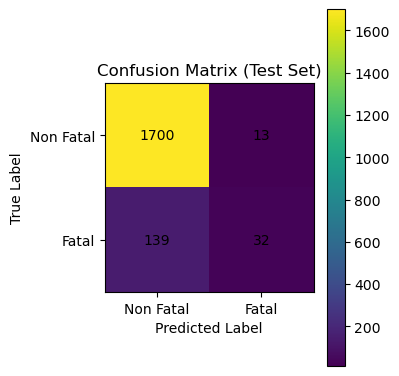

In [136]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
y_scores = model.predict(test_df)
cm = confusion_matrix(y_test, (y_scores >= 0.5).astype(int))

plt.figure(figsize=(4, 4))
plt.imshow(cm, interpolation="nearest")
plt.title("Confusion Matrix (Test Set)")
plt.colorbar()

tick_labels = ["Non Fatal", "Fatal"]
plt.xticks([0, 1], tick_labels)
plt.yticks([0, 1], tick_labels)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


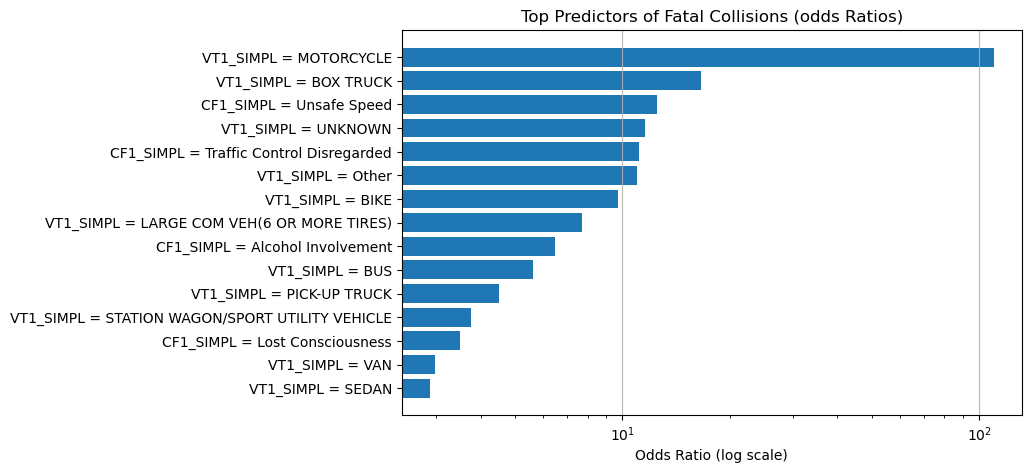

In [147]:
import matplotlib.pyplot as plt
import numpy as np

# pick top K important terms (excluding Intercept and maybe HOUR)
plot_df = or_table.drop(index=["Intercept"]).copy()
plot_df = plot_df.sort_values("odds_ratio", ascending=False).head(15)

plt.figure(figsize=(8, 5))
y_p= np.arange(len(plot_df))

plt.barh(y_p, plot_df["odds_ratio"])
plt.yticks(y_p, plot_df.index)
plt.xlabel("Odds Ratio (log scale)")
plt.xscale("log")
plt.title("Top Predictors of Fatal Collisions (odds Ratios)")
plt.gca().invert_yaxis()
plt.grid(axis="x", alpha=0.9)
plt.show()


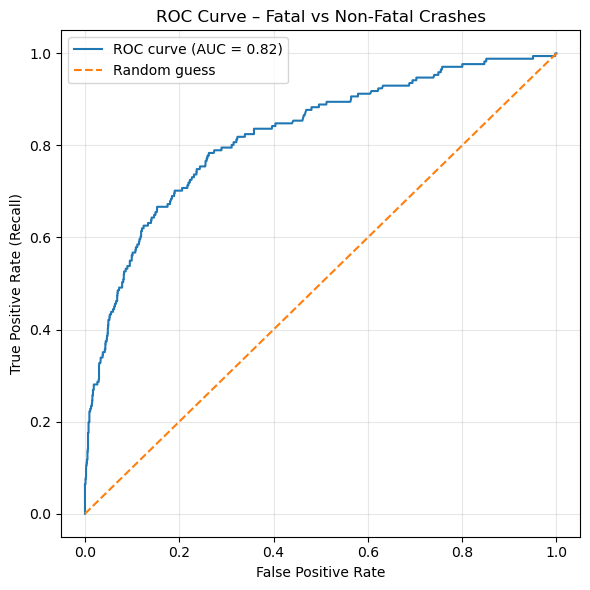

In [105]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_test = test_df["ANY_FATALITY"]
y_scores = model.predict(test_df)  # predicted probabilities

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve – Fatal vs Non-Fatal Crashes")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
